In [92]:
# Import required libraries and dependencies
import pandas as pd


US crimes July 2016 - August 2022

In [93]:
# To do after Geoff push

US crime rates 1960-2014

,year,population,total,total_violent,total_nonviolent,murder,forcible_rape,robbery,aggravated_assault,burglary,larceny_theft,vehicle_theft
0,1960,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1,1961,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
2,1962,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
3,1963,188483000,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
4,1964,191141000,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   year                55 non-null     int64
 1   population          55 non-null     int64
 2   total               55 non-null     int64
 3   total_violent       55 non-null     int64
 4   total_nonviolent    55 non-null     int64
 5   murder              55 non-null     int64
 6   forcible_rape       55 non-null     int64
 7   robbery             55 non-null     int64
 8   aggravated_assault  55 non-null     int64
 9   burglary            55 non-null     int64
 10  larceny_theft       55 non-null     int64
 11  vehicle_theft       55 non-null     int64
dtypes: int64(12)
memory usage: 5.3 KB


None

,total_nonviolent
year,
1960,3.0957
1961,3.1986
1962,3.4507
1963,3.7925
1964,4.2004


,total_nonviolent
year,
2010,9.112625
2011,9.052743
2012,9.001992
2013,8.650761
2014,8.277829


,ds,y
0,1960-01-01,3.0957
1,1961-01-01,3.1986
2,1962-01-01,3.4507
3,1963-01-01,3.7925
4,1964-01-01,4.2004


,ds,y
50,2010-01-01,9.112625
51,2011-01-01,9.052743
52,2012-01-01,9.001992
53,2013-01-01,8.650761
54,2014-01-01,8.277829


,ds,y
0,1960-12-31,3.0957
1,1961-12-31,3.1986
2,1962-12-31,3.4507
3,1963-12-31,3.7925
4,1964-12-31,4.2004


,ds,y
50,2010-12-31,9.112625
51,2011-12-31,9.052743
52,2012-12-31,9.001992
53,2013-12-31,8.650761
54,2014-12-31,8.277829


12:52:57 - cmdstanpy - INFO - Chain [1] start processing
12:52:57 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1960-12-31,2.604326,2.223990,3.277285,2.604326,2.604326,0.144244,0.144244,0.144244,0.144244,0.144244,0.144244,0.0,0.0,0.0,2.748570
1,1961-12-31,3.039222,2.591901,3.650265,3.039222,3.039222,0.088196,0.088196,0.088196,0.088196,0.088196,0.088196,0.0,0.0,0.0,3.127418
2,1962-12-31,3.474119,3.034299,4.075576,3.474119,3.474119,0.084626,0.084626,0.084626,0.084626,0.084626,0.084626,0.0,0.0,0.0,3.558744
3,1963-12-31,3.909015,3.522780,4.588824,3.909015,3.909015,0.133530,0.133530,0.133530,0.133530,0.133530,0.133530,0.0,0.0,0.0,4.042545
4,1964-12-31,4.345103,3.954737,4.987517,4.345103,4.345103,0.144244,0.144244,0.144244,0.144244,0.144244,0.144244,0.0,0.0,0.0,4.489347


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
70,2030-12-31,5.775127,4.704438,7.012072,4.806199,6.801171,0.084626,0.084626,0.084626,0.084626,0.084626,0.084626,0.0,0.0,0.0,5.859752
71,2031-12-31,5.608066,4.529656,6.940897,4.544507,6.752068,0.133530,0.133530,0.133530,0.133530,0.133530,0.133530,0.0,0.0,0.0,5.741596
72,2032-12-31,5.440548,4.268476,6.905234,4.278732,6.686701,0.144244,0.144244,0.144244,0.144244,0.144244,0.144244,0.0,0.0,0.0,5.584792
73,2033-12-31,5.273487,4.023826,6.806327,4.006475,6.627818,0.088196,0.088196,0.088196,0.088196,0.088196,0.088196,0.0,0.0,0.0,5.361683
74,2034-12-31,5.106427,3.707102,6.766992,3.712108,6.600075,0.084626,0.084626,0.084626,0.084626,0.084626,0.084626,0.0,0.0,0.0,5.191053


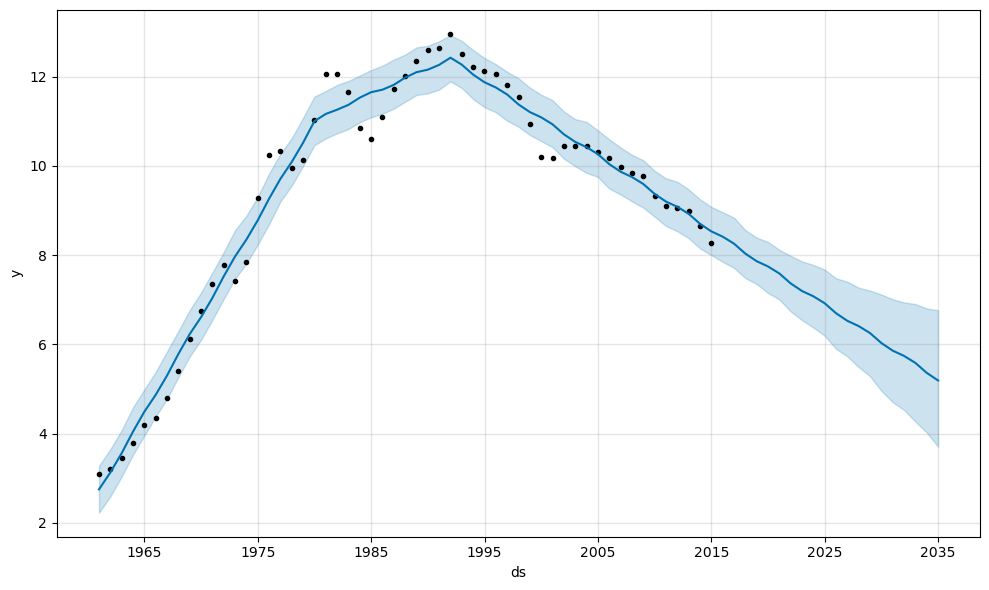

12:52:57 - cmdstanpy - INFO - Chain [1] start processing
12:52:58 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1984-12-31,0.855366,10.918342,11.816520,0.855366,0.855366,10.512791,10.512791,10.512791,10.512791,10.512791,10.512791,0.0,0.0,0.0,11.368158
1,1985-12-31,1.010746,11.151806,11.966596,1.010746,1.010746,10.529480,10.529480,10.529480,10.529480,10.529480,10.529480,0.0,0.0,0.0,11.540226
2,1986-12-31,1.166125,11.306332,12.118037,1.166125,1.166125,10.550725,10.550725,10.550725,10.550725,10.550725,10.550725,0.0,0.0,0.0,11.716851
3,1987-12-31,1.321505,11.491081,12.308557,1.321505,1.321505,10.576514,10.576514,10.576514,10.576514,10.576514,10.576514,0.0,0.0,0.0,11.898019
4,1988-12-31,1.477307,11.527728,12.423311,1.477307,1.477307,10.512791,10.512791,10.512791,10.512791,10.512791,10.512791,0.0,0.0,0.0,11.990098


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
46,2030-12-31,-4.858189,4.744366,6.587225,-5.670329,-4.033434,10.550725,10.550725,10.550725,10.550725,10.550725,10.550725,0.0,0.0,0.0,5.692536
47,2031-12-31,-5.032427,4.509763,6.539132,-5.916862,-4.141056,10.576514,10.576514,10.576514,10.576514,10.576514,10.576514,0.0,0.0,0.0,5.544087
48,2032-12-31,-5.207142,4.167672,6.350900,-6.165454,-4.235337,10.512791,10.512791,10.512791,10.512791,10.512791,10.512791,0.0,0.0,0.0,5.305649
49,2033-12-31,-5.381380,4.037616,6.264927,-6.426420,-4.323990,10.529480,10.529480,10.529480,10.529480,10.529480,10.529480,0.0,0.0,0.0,5.148100
50,2034-12-31,-5.555618,3.751252,6.251576,-6.675457,-4.387930,10.550725,10.550725,10.550725,10.550725,10.550725,10.550725,0.0,0.0,0.0,4.995108


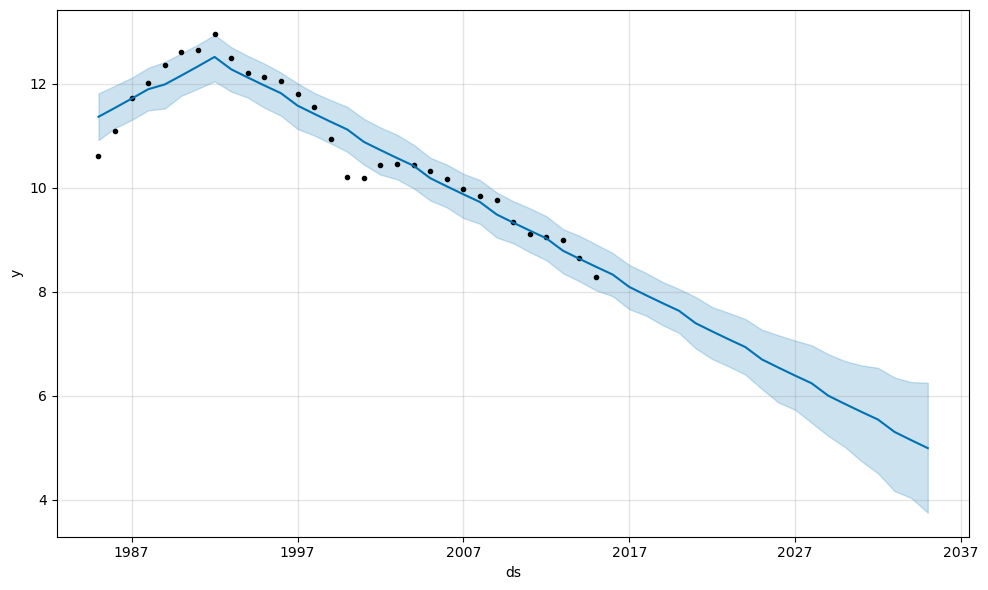

,total_violent
year,
1960,0.28846
1961,0.28939
1962,0.30151
1963,0.31697
1964,0.36422


,total_violent
year,
2010,1.251248
2011,1.206031
2012,1.217067
2013,1.199684
2014,1.197987


,ds,y
0,1960-01-01,0.28846
1,1961-01-01,0.28939
2,1962-01-01,0.30151
3,1963-01-01,0.31697
4,1964-01-01,0.36422


,ds,y
50,2010-01-01,1.251248
51,2011-01-01,1.206031
52,2012-01-01,1.217067
53,2013-01-01,1.199684
54,2014-01-01,1.197987


,ds,y
0,1960-12-31,0.28846
1,1961-12-31,0.28939
2,1962-12-31,0.30151
3,1963-12-31,0.31697
4,1964-12-31,0.36422


,ds,y
50,2010-12-31,1.251248
51,2011-12-31,1.206031
52,2012-12-31,1.217067
53,2013-12-31,1.199684
54,2014-12-31,1.197987


12:52:58 - cmdstanpy - INFO - Chain [1] start processing
12:52:58 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1960-12-31,0.149017,0.240560,1.010760,0.149017,0.149017,0.473032,0.473032,0.473032,0.473032,0.473032,0.473032,0.0,0.0,0.0,0.622049
1,1961-12-31,0.169615,0.264190,1.058355,0.169615,0.169615,0.479303,0.479303,0.479303,0.479303,0.479303,0.479303,0.0,0.0,0.0,0.648918
2,1962-12-31,0.190213,0.266037,1.065737,0.190213,0.190213,0.487994,0.487994,0.487994,0.487994,0.487994,0.487994,0.0,0.0,0.0,0.678208
3,1963-12-31,0.210812,0.282058,1.104562,0.210812,0.210812,0.499095,0.499095,0.499095,0.499095,0.499095,0.499095,0.0,0.0,0.0,0.709907
4,1964-12-31,0.231466,0.323225,1.122415,0.231466,0.231466,0.473032,0.473032,0.473032,0.473032,0.473032,0.473032,0.0,0.0,0.0,0.704498


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
70,2030-12-31,1.583470,1.672932,2.481557,1.583113,1.583799,0.487994,0.487994,0.487994,0.487994,0.487994,0.487994,0.0,0.0,0.0,2.071465
71,2031-12-31,1.603863,1.673207,2.497404,1.603468,1.604230,0.499095,0.499095,0.499095,0.499095,0.499095,0.499095,0.0,0.0,0.0,2.102959
72,2032-12-31,1.624313,1.714950,2.518592,1.623873,1.624710,0.473032,0.473032,0.473032,0.473032,0.473032,0.473032,0.0,0.0,0.0,2.097345
73,2033-12-31,1.644706,1.706465,2.491535,1.644234,1.645132,0.479303,0.479303,0.479303,0.479303,0.479303,0.479303,0.0,0.0,0.0,2.124009
74,2034-12-31,1.665099,1.768458,2.591723,1.664590,1.665560,0.487994,0.487994,0.487994,0.487994,0.487994,0.487994,0.0,0.0,0.0,2.153094


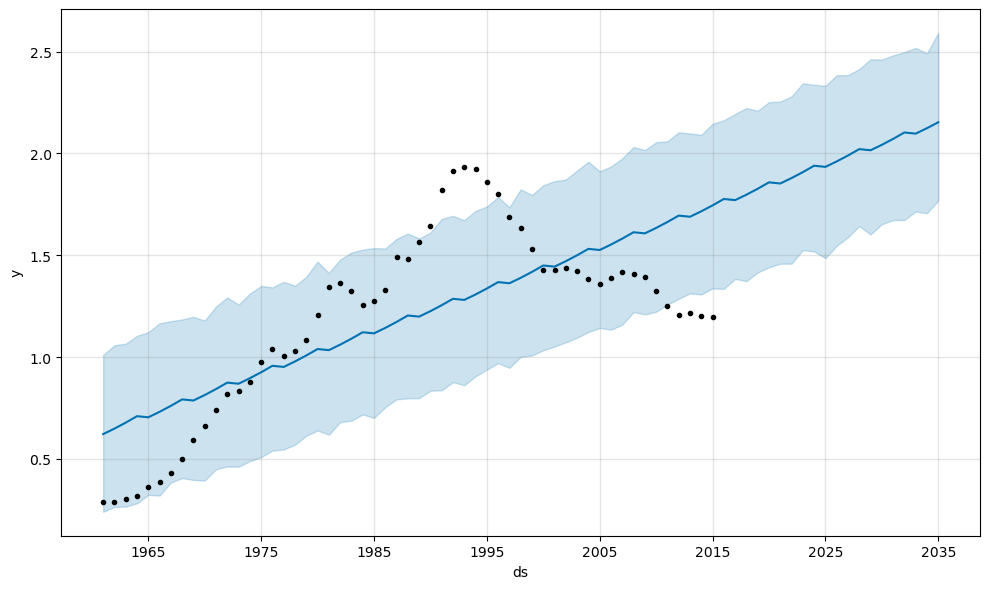

12:52:58 - cmdstanpy - INFO - Chain [1] start processing
12:52:58 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1984-12-31,-0.035985,1.453509,1.915677,-0.035985,-0.035985,1.727151,1.727151,1.727151,1.727151,1.727151,1.727151,0.0,0.0,0.0,1.691166
1,1985-12-31,-0.050828,1.470134,1.916070,-0.050828,-0.050828,1.747825,1.747825,1.747825,1.747825,1.747825,1.747825,0.0,0.0,0.0,1.696997
2,1986-12-31,-0.065672,1.460633,1.925008,-0.065672,-0.065672,1.765648,1.765648,1.765648,1.765648,1.765648,1.765648,0.0,0.0,0.0,1.699976
3,1987-12-31,-0.080515,1.477280,1.924052,-0.080515,-0.080515,1.780596,1.780596,1.780596,1.780596,1.780596,1.780596,0.0,0.0,0.0,1.700081
4,1988-12-31,-0.095400,1.421221,1.873612,-0.095400,-0.095400,1.727151,1.727151,1.727151,1.727151,1.727151,1.727151,0.0,0.0,0.0,1.631751


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
46,2030-12-31,-0.721385,0.812605,1.287716,-0.721537,-0.721244,1.765648,1.765648,1.765648,1.765648,1.765648,1.765648,0.0,0.0,0.0,1.044262
47,2031-12-31,-0.736288,0.822102,1.265483,-0.736453,-0.736133,1.780596,1.780596,1.780596,1.780596,1.780596,1.780596,0.0,0.0,0.0,1.044309
48,2032-12-31,-0.751231,0.747358,1.212686,-0.751410,-0.751063,1.727151,1.727151,1.727151,1.727151,1.727151,1.727151,0.0,0.0,0.0,0.975920
49,2033-12-31,-0.766133,0.751984,1.213138,-0.766328,-0.765951,1.747825,1.747825,1.747825,1.747825,1.747825,1.747825,0.0,0.0,0.0,0.981692
50,2034-12-31,-0.781036,0.747220,1.213180,-0.781244,-0.780839,1.765648,1.765648,1.765648,1.765648,1.765648,1.765648,0.0,0.0,0.0,0.984612


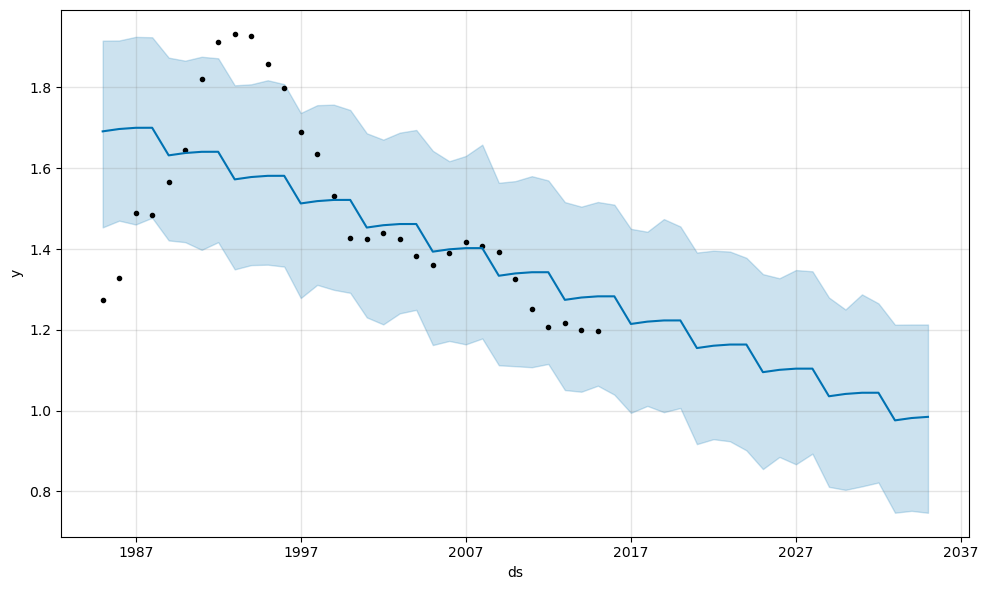

In [94]:
# Run ipynb file
%run crime_1960_2014.ipynb

Inflation rates by country 1970-2022

,country_code,imf_country_code,country,indicator_type,series_name,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,note,unnamed:_59,unnamed:_60,unnamed:_61,unnamed:_62,unnamed:_63
0,ABW,314.0,Aruba,Inflation,Headline Consumer Price Inflation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.20,3.00,1.88,2.28,4.05,2.89,3.32,3.66,2.53,3.40,3.61,5.39,8.96,-2.14,2.08,4.32,0.63,-2.37,0.42,0.48,-0.89,-0.47,3.58,4.26,1.22,0.74,6.04,Annual average inflation,NaN,NaN,NaN,NaN,NaN
1,AFG,512.0,Afghanistan,Inflation,Headline Consumer Price Inflation,25.51,25.51,-12.52,-10.68,10.23,11.85,0.60,7.65,5.00,9.90,13.40,22.20,18.20,15.90,20.40,8.70,-2.10,18.40,27.50,71.50,47.40,43.80,58.19,33.99,20.01,14.00,14.01,14.01,14.01,14.01,0.00,-43.40,51.93,35.66,16.36,10.57,6.78,8.68,26.42,-6.81,2.18,11.80,6.44,7.39,4.67,-0.66,4.38,4.98,0.63,2.30,5.44,5.06,NaN,Annual average inflation,NaN,NaN,NaN,NaN,NaN
2,AGO,614.0,Angola,Inflation,Headline Consumer Price Inflation,7.97,5.78,15.80,15.67,27.42,29.00,80.70,69.01,48.46,101.30,46.71,1.39,1.83,1.83,1.83,1.83,1.83,1.83,1.83,1.83,1.83,85.26,299.10,1379.48,949.77,2672.23,4146.01,221.49,107.43,248.25,325.03,152.59,108.89,98.22,43.53,22.96,13.31,12.25,12.47,13.72,14.48,13.48,10.28,8.78,7.30,9.16,32.38,29.84,19.63,17.08,21.02,23.85,21.35,Annual average inflation,NaN,NaN,NaN,NaN,NaN
3,ALB,914.0,Albania,Inflation,Headline Consumer Price Inflation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.18,35.72,226.00,85.00,22.57,7.75,12.80,33.21,20.55,0.40,0.03,3.10,5.18,2.38,2.83,2.36,2.41,2.91,3.41,2.29,3.57,3.41,2.03,1.93,1.62,1.91,1.29,1.99,2.03,1.41,1.62,2.04,6.73,Annual average inflation,NaN,NaN,NaN,NaN,NaN
4,ARE,466.0,United Arab Emirates,Inflation,Headline Consumer Price Inflation,21.98,21.98,21.98,21.98,21.98,21.98,21.98,21.97,13.04,10.99,10.07,7.95,7.08,1.30,2.43,3.50,5.43,5.50,4.99,2.79,0.60,3.40,6.38,5.27,5.70,4.33,2.98,2.97,1.99,2.10,1.35,2.80,2.92,3.12,5.04,6.20,9.28,11.13,12.27,1.57,0.88,0.88,0.66,1.09,2.34,4.07,1.62,1.97,3.06,-1.93,-2.08,0.18,5.22,Annual average inflation,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783 entries, 0 to 782
Data columns (total 64 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country_code      783 non-null    object 
 1   imf_country_code  781 non-null    float64
 2   country           783 non-null    object 
 3   indicator_type    783 non-null    object 
 4   series_name       783 non-null    object 
 5   1970              422 non-null    float64
 6   1971              428 non-null    float64
 7   1972              430 non-null    float64
 8   1973              430 non-null    float64
 9   1974              434 non-null    float64
 10  1975              434 non-null    float64
 11  1976              430 non-null    float64
 12  1977              427 non-null    float64
 13  1978              428 non-null    float64
 14  1979              428 non-null    float64
 15  1980              433 non-null    float64
 16  1981              451 non-null    float64
 1

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 64 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country_code      5 non-null      object 
 1   imf_country_code  5 non-null      float64
 2   country           5 non-null      object 
 3   indicator_type    5 non-null      object 
 4   series_name       5 non-null      object 
 5   1970              4 non-null      float64
 6   1971              4 non-null      float64
 7   1972              4 non-null      float64
 8   1973              4 non-null      float64
 9   1974              4 non-null      float64
 10  1975              4 non-null      float64
 11  1976              4 non-null      float64
 12  1977              4 non-null      float64
 13  1978              4 non-null      float64
 14  1979              4 non-null      float64
 15  1980              4 non-null      float64
 16  1981              4 non-null      float64
 17  1

series_name,Food Consumer Price Inflation,Headline Consumer Price Inflation,Official Core Consumer Price Inflation,Producer Price Inflation
year,,,,
1970,5.40,5.90,6.245934,3.61
1971,3.07,4.29,4.690000,3.33
1972,4.13,3.27,3.060000,4.41
1973,13.29,6.18,3.480000,13.14
1974,13.76,11.05,8.240000,18.81


series_name,Food Consumer Price Inflation,Headline Consumer Price Inflation,Official Core Consumer Price Inflation,Producer Price Inflation
year,,,,
2018,1.40,2.44,2.14,2.90
2019,0.89,1.81,2.19,1.69
2020,3.51,1.23,1.70,-2.12
2021,3.47,4.70,3.57,8.95
2022,11.35,8.00,6.22,7.91


<class 'pandas.core.frame.DataFrame'>
Index: 53 entries, 1970 to 2022
Data columns (total 4 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Food Consumer Price Inflation           53 non-null     float64
 1   Headline Consumer Price Inflation       53 non-null     float64
 2   Official Core Consumer Price Inflation  53 non-null     float64
 3   Producer Price Inflation                53 non-null     float64
dtypes: float64(4)
memory usage: 2.1+ KB


,Official Core Consumer Price Inflation
year,
1970,6.245934
1971,4.690000
1972,3.060000
1973,3.480000
1974,8.240000


,Official Core Consumer Price Inflation
year,
2018,2.14
2019,2.19
2020,1.70
2021,3.57
2022,6.22


,ds,y
0,1970-12-31,6.245934
1,1971-12-31,4.690000
2,1972-12-31,3.060000
3,1973-12-31,3.480000
4,1974-12-31,8.240000


,ds,y
48,2018-12-31,2.14
49,2019-12-31,2.19
50,2020-12-31,1.70
51,2021-12-31,3.57
52,2022-12-31,6.22


12:52:59 - cmdstanpy - INFO - Chain [1] start processing
12:52:59 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1970-12-31,-1.572372,4.489880,9.194625,-1.572372,-1.572372,8.435798,8.435798,8.435798,8.435798,8.435798,8.435798,0.0,0.0,0.0,6.863426
1,1971-12-31,-1.682836,4.394496,9.123888,-1.682836,-1.682836,8.425420,8.425420,8.425420,8.425420,8.425420,8.425420,0.0,0.0,0.0,6.742584
2,1972-12-31,-1.793604,4.084633,8.955031,-1.793604,-1.793604,8.339314,8.339314,8.339314,8.339314,8.339314,8.339314,0.0,0.0,0.0,6.545711
3,1973-12-31,-1.904068,4.240240,8.794709,-1.904068,-1.904068,8.407082,8.407082,8.407082,8.407082,8.407082,8.407082,0.0,0.0,0.0,6.503014
4,1974-12-31,-2.014533,3.862163,8.821227,-2.014533,-2.014533,8.435798,8.435798,8.435798,8.435798,8.435798,8.435798,0.0,0.0,0.0,6.421265


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
68,2038-12-31,-9.089033,-3.020167,1.813880,-9.089037,-9.089029,8.435798,8.435798,8.435798,8.435798,8.435798,8.435798,0.0,0.0,0.0,-0.653236
69,2039-12-31,-9.199496,-3.203305,1.688600,-9.199500,-9.199491,8.425420,8.425420,8.425420,8.425420,8.425420,8.425420,0.0,0.0,0.0,-0.774076
70,2040-12-31,-9.310261,-3.483665,1.147175,-9.310265,-9.310255,8.339314,8.339314,8.339314,8.339314,8.339314,8.339314,0.0,0.0,0.0,-0.970946
71,2041-12-31,-9.420723,-3.514712,1.293533,-9.420728,-9.420717,8.407082,8.407082,8.407082,8.407082,8.407082,8.407082,0.0,0.0,0.0,-1.013641
72,2042-12-31,-9.531185,-3.374901,1.388613,-9.531191,-9.531179,8.435798,8.435798,8.435798,8.435798,8.435798,8.435798,0.0,0.0,0.0,-1.095388


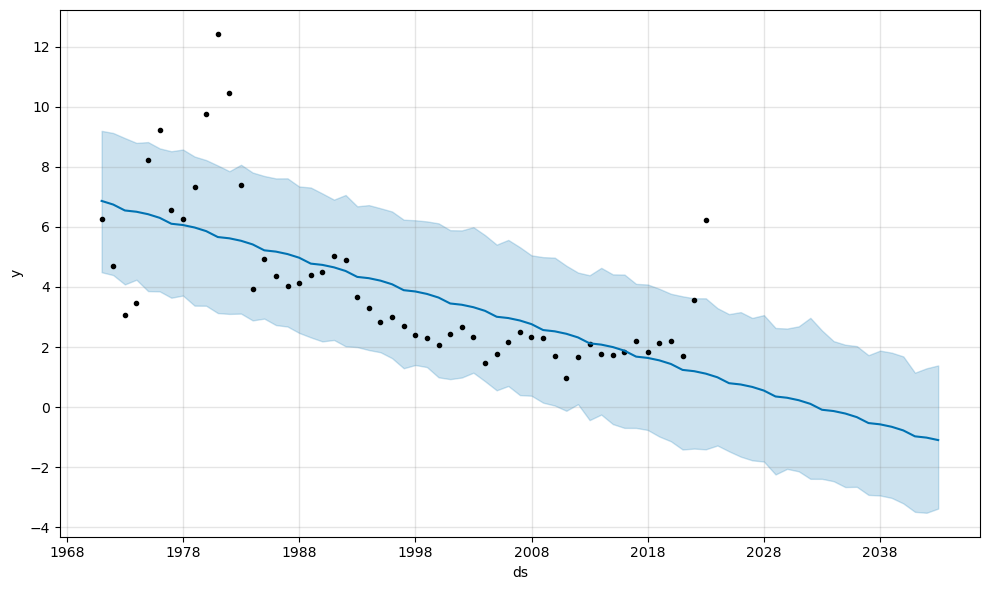

12:52:59 - cmdstanpy - INFO - Chain [1] start processing
12:52:59 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1992-12-31,-1.658208,1.359229,3.749681,-1.658208,-1.658208,4.158067,4.158067,4.158067,4.158067,4.158067,4.158067,0.0,0.0,0.0,2.499859
1,1993-12-31,-1.662056,1.251091,3.644258,-1.662056,-1.662056,4.141930,4.141930,4.141930,4.141930,4.141930,4.141930,0.0,0.0,0.0,2.479874
2,1994-12-31,-1.665903,1.312944,3.632780,-1.665903,-1.665903,4.087358,4.087358,4.087358,4.087358,4.087358,4.087358,0.0,0.0,0.0,2.421455
3,1995-12-31,-1.669751,1.199058,3.482476,-1.669751,-1.669751,3.994415,3.994415,3.994415,3.994415,3.994415,3.994415,0.0,0.0,0.0,2.324665
4,1996-12-31,-1.673609,1.322416,3.629816,-1.673609,-1.673609,4.158067,4.158067,4.158067,4.158067,4.158067,4.158067,0.0,0.0,0.0,2.484459


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
46,2038-12-31,-1.835279,1.105920,3.421513,-1.835281,-1.835277,4.087358,4.087358,4.087358,4.087358,4.087358,4.087358,0.0,0.0,0.0,2.252079
47,2039-12-31,-1.839126,1.002965,3.394696,-1.839128,-1.839123,3.994415,3.994415,3.994415,3.994415,3.994415,3.994415,0.0,0.0,0.0,2.155290
48,2040-12-31,-1.842983,1.132040,3.481792,-1.842985,-1.842980,4.158067,4.158067,4.158067,4.158067,4.158067,4.158067,0.0,0.0,0.0,2.315085
49,2041-12-31,-1.846829,1.108936,3.347349,-1.846832,-1.846826,4.141930,4.141930,4.141930,4.141930,4.141930,4.141930,0.0,0.0,0.0,2.295101
50,2042-12-31,-1.850676,1.084200,3.425516,-1.850679,-1.850673,4.087358,4.087358,4.087358,4.087358,4.087358,4.087358,0.0,0.0,0.0,2.236682


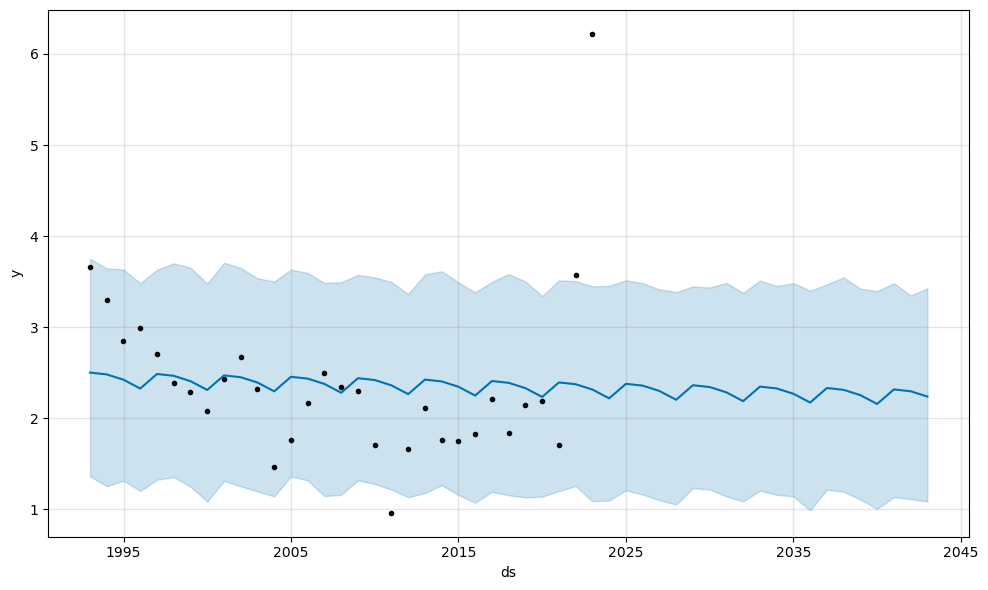

In [95]:
# Run ipynb file
%run inflation.ipynb

Unenployment rate by country 1991-2021

In [96]:
# Run ipynb file
%run unemployment.ipynb

,country_name,country_code,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Africa Eastern and Southern,AFE,7.80,7.84,7.85,7.84,7.83,7.84,7.86,7.81,7.79,7.72,7.73,7.96,7.79,7.31,7.12,6.99,6.74,6.27,6.32,6.87,6.75,6.56,6.45,6.41,6.49,6.61,6.71,6.73,6.91,7.56,8.11
1,Afghanistan,AFG,10.65,10.82,10.72,10.73,11.18,10.96,10.78,10.80,10.81,10.81,10.81,11.26,11.14,10.99,11.22,11.10,11.30,11.09,11.31,11.35,11.05,11.34,11.19,11.14,11.13,11.16,11.18,11.15,11.22,11.71,13.28
2,Africa Western and Central,AFW,4.42,4.53,4.55,4.54,4.53,4.57,4.60,4.66,4.86,4.92,4.87,4.78,4.75,4.73,4.73,4.65,4.63,4.60,4.58,4.55,4.55,4.64,4.41,4.69,4.63,5.57,6.02,6.04,6.06,6.77,6.84
3,Angola,AGO,4.21,4.21,4.23,4.16,4.11,4.10,4.09,4.07,4.05,4.03,4.00,3.96,3.96,3.92,3.88,3.86,3.82,3.79,3.78,9.43,7.36,7.35,7.37,7.37,7.39,7.41,7.41,7.42,7.42,8.33,8.53
4,Albania,ALB,10.31,30.01,25.26,20.84,14.61,13.93,16.88,20.05,20.84,19.03,18.58,17.90,16.99,16.31,15.97,15.63,15.97,13.06,13.67,14.09,13.48,13.38,15.87,18.05,17.19,15.42,13.62,12.30,11.47,13.33,11.82


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 33 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_name  235 non-null    object 
 1   country_code  235 non-null    object 
 2   1991          235 non-null    float64
 3   1992          235 non-null    float64
 4   1993          235 non-null    float64
 5   1994          235 non-null    float64
 6   1995          235 non-null    float64
 7   1996          235 non-null    float64
 8   1997          235 non-null    float64
 9   1998          235 non-null    float64
 10  1999          235 non-null    float64
 11  2000          235 non-null    float64
 12  2001          235 non-null    float64
 13  2002          235 non-null    float64
 14  2003          235 non-null    float64
 15  2004          235 non-null    float64
 16  2005          235 non-null    float64
 17  2006          235 non-null    float64
 18  2007          235 non-null    

None

,year,unemployment_rate
0,1991,6.80
1,1992,7.50
2,1993,6.90
3,1994,6.12
4,1995,5.65


,year,unemployment_rate
26,2017,4.36
27,2018,3.90
28,2019,3.67
29,2020,8.05
30,2021,5.46


Combine & Compare Datasets

In [97]:
# Check if global variance is available
# Pylance may generate linter warnings for global variables
if "unemployment_us_melt" in globals():
    print("Global variable available.")
else:
    print("Unemployment variable not available.\nRerun notebook.")


Global variable available.


In [98]:
# Reset index to year
unemployment_us_melt = unemployment_us_melt.set_index('year')
unemployment_us_melt.head()

,unemployment_rate
year,
1991,6.80
1992,7.50
1993,6.90
1994,6.12
1995,5.65


In [99]:
# Check if global variance is available
# Pylance may generate linter warnings for global variables
if "total_crimes" in globals():
    print("Global variable available.")
else:
    print("Crimes variable not available.\nRerun notebook.")

Global variable available.


In [100]:
# Show unemployment index
unemployment_us_melt.index

Index(['1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020', '2021'],
      dtype='object', name='year')

In [101]:
# Show crime index
total_crimes.index

Int64Index([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
            1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
            1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
            1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
            2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014],
           dtype='int64', name='year')

In [102]:
# Convert index to string
total_crimes.index = total_crimes.index.astype(str)

# Show crime index
total_crimes.index

Index(['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014'],
      dtype='object', name='year')

In [103]:
# Convert columns to strings
total_crimes.columns = total_crimes.columns.astype(str)

In [104]:
# Concat crime and unemployment data
crime_unemployment = pd.concat([total_crimes, unemployment_us_melt], join='inner', axis=1)
crime_unemployment.tail(20)

,total_violent,total_nonviolent,unemployment_rate
year,,,
1995,1.798790,12.063900,5.65
1996,1.688540,11.805300,5.45
1997,1.634770,11.558175,5.00
1998,1.531044,10.944590,4.51
1999,1.426044,10.208334,4.22
2000,1.425486,10.182586,3.99
2001,1.439480,10.437480,4.73
2002,1.423677,10.455277,5.78
2003,1.383676,10.442862,5.99


In [105]:
# Plot unemployment and crime rates to compare
crime_unemployment_plot = crime_unemployment.hvplot(
    title = "Crime Unemployment Comparison",
    xlabel = "Year",
    ylabel = "Rate",
    width = 1000,
    height = 500,
    grid = True,
    rot = 45
)

#Display plot
crime_unemployment_plot

:NdOverlay   [Variable]
   :Curve   [year]   (value)

,country_code,imf_country_code,country,indicator_type,series_name,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,note,unnamed:_59,unnamed:_60,unnamed:_61,unnamed:_62,unnamed:_63
0,ABW,314.0,Aruba,Inflation,Headline Consumer Price Inflation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.20,3.00,1.88,2.28,4.05,2.89,3.32,3.66,2.53,3.40,3.61,5.39,8.96,-2.14,2.08,4.32,0.63,-2.37,0.42,0.48,-0.89,-0.47,3.58,4.26,1.22,0.74,6.04,Annual average inflation,NaN,NaN,NaN,NaN,NaN
1,AFG,512.0,Afghanistan,Inflation,Headline Consumer Price Inflation,25.51,25.51,-12.52,-10.68,10.23,11.85,0.60,7.65,5.00,9.90,13.40,22.20,18.20,15.90,20.40,8.70,-2.10,18.40,27.50,71.50,47.40,43.80,58.19,33.99,20.01,14.00,14.01,14.01,14.01,14.01,0.00,-43.40,51.93,35.66,16.36,10.57,6.78,8.68,26.42,-6.81,2.18,11.80,6.44,7.39,4.67,-0.66,4.38,4.98,0.63,2.30,5.44,5.06,NaN,Annual average inflation,NaN,NaN,NaN,NaN,NaN
2,AGO,614.0,Angola,Inflation,Headline Consumer Price Inflation,7.97,5.78,15.80,15.67,27.42,29.00,80.70,69.01,48.46,101.30,46.71,1.39,1.83,1.83,1.83,1.83,1.83,1.83,1.83,1.83,1.83,85.26,299.10,1379.48,949.77,2672.23,4146.01,221.49,107.43,248.25,325.03,152.59,108.89,98.22,43.53,22.96,13.31,12.25,12.47,13.72,14.48,13.48,10.28,8.78,7.30,9.16,32.38,29.84,19.63,17.08,21.02,23.85,21.35,Annual average inflation,NaN,NaN,NaN,NaN,NaN
3,ALB,914.0,Albania,Inflation,Headline Consumer Price Inflation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.18,35.72,226.00,85.00,22.57,7.75,12.80,33.21,20.55,0.40,0.03,3.10,5.18,2.38,2.83,2.36,2.41,2.91,3.41,2.29,3.57,3.41,2.03,1.93,1.62,1.91,1.29,1.99,2.03,1.41,1.62,2.04,6.73,Annual average inflation,NaN,NaN,NaN,NaN,NaN
4,ARE,466.0,United Arab Emirates,Inflation,Headline Consumer Price Inflation,21.98,21.98,21.98,21.98,21.98,21.98,21.98,21.97,13.04,10.99,10.07,7.95,7.08,1.30,2.43,3.50,5.43,5.50,4.99,2.79,0.60,3.40,6.38,5.27,5.70,4.33,2.98,2.97,1.99,2.10,1.35,2.80,2.92,3.12,5.04,6.20,9.28,11.13,12.27,1.57,0.88,0.88,0.66,1.09,2.34,4.07,1.62,1.97,3.06,-1.93,-2.08,0.18,5.22,Annual average inflation,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783 entries, 0 to 782
Data columns (total 64 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country_code      783 non-null    object 
 1   imf_country_code  781 non-null    float64
 2   country           783 non-null    object 
 3   indicator_type    783 non-null    object 
 4   series_name       783 non-null    object 
 5   1970              422 non-null    float64
 6   1971              428 non-null    float64
 7   1972              430 non-null    float64
 8   1973              430 non-null    float64
 9   1974              434 non-null    float64
 10  1975              434 non-null    float64
 11  1976              430 non-null    float64
 12  1977              427 non-null    float64
 13  1978              428 non-null    float64
 14  1979              428 non-null    float64
 15  1980              433 non-null    float64
 16  1981              451 non-null    float64
 1

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 64 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country_code      5 non-null      object 
 1   imf_country_code  5 non-null      float64
 2   country           5 non-null      object 
 3   indicator_type    5 non-null      object 
 4   series_name       5 non-null      object 
 5   1970              4 non-null      float64
 6   1971              4 non-null      float64
 7   1972              4 non-null      float64
 8   1973              4 non-null      float64
 9   1974              4 non-null      float64
 10  1975              4 non-null      float64
 11  1976              4 non-null      float64
 12  1977              4 non-null      float64
 13  1978              4 non-null      float64
 14  1979              4 non-null      float64
 15  1980              4 non-null      float64
 16  1981              4 non-null      float64
 17  1

series_name,Food Consumer Price Inflation,Headline Consumer Price Inflation,Official Core Consumer Price Inflation,Producer Price Inflation
year,,,,
1970,5.40,5.90,6.245934,3.61
1971,3.07,4.29,4.690000,3.33
1972,4.13,3.27,3.060000,4.41
1973,13.29,6.18,3.480000,13.14
1974,13.76,11.05,8.240000,18.81


series_name,Food Consumer Price Inflation,Headline Consumer Price Inflation,Official Core Consumer Price Inflation,Producer Price Inflation
year,,,,
2018,1.40,2.44,2.14,2.90
2019,0.89,1.81,2.19,1.69
2020,3.51,1.23,1.70,-2.12
2021,3.47,4.70,3.57,8.95
2022,11.35,8.00,6.22,7.91


<class 'pandas.core.frame.DataFrame'>
Index: 53 entries, 1970 to 2022
Data columns (total 4 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Food Consumer Price Inflation           53 non-null     float64
 1   Headline Consumer Price Inflation       53 non-null     float64
 2   Official Core Consumer Price Inflation  53 non-null     float64
 3   Producer Price Inflation                53 non-null     float64
dtypes: float64(4)
memory usage: 2.1+ KB


,Official Core Consumer Price Inflation
year,
1970,6.245934
1971,4.690000
1972,3.060000
1973,3.480000
1974,8.240000


,Official Core Consumer Price Inflation
year,
2018,2.14
2019,2.19
2020,1.70
2021,3.57
2022,6.22


,ds,y
0,1970-12-31,6.245934
1,1971-12-31,4.690000
2,1972-12-31,3.060000
3,1973-12-31,3.480000
4,1974-12-31,8.240000


,ds,y
48,2018-12-31,2.14
49,2019-12-31,2.19
50,2020-12-31,1.70
51,2021-12-31,3.57
52,2022-12-31,6.22


12:53:00 - cmdstanpy - INFO - Chain [1] start processing
12:53:00 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1970-12-31,-1.572372,4.469953,9.286516,-1.572372,-1.572372,8.435798,8.435798,8.435798,8.435798,8.435798,8.435798,0.0,0.0,0.0,6.863426
1,1971-12-31,-1.682836,4.337568,9.149134,-1.682836,-1.682836,8.425420,8.425420,8.425420,8.425420,8.425420,8.425420,0.0,0.0,0.0,6.742584
2,1972-12-31,-1.793604,4.304623,8.945337,-1.793604,-1.793604,8.339314,8.339314,8.339314,8.339314,8.339314,8.339314,0.0,0.0,0.0,6.545711
3,1973-12-31,-1.904068,3.955887,8.959948,-1.904068,-1.904068,8.407082,8.407082,8.407082,8.407082,8.407082,8.407082,0.0,0.0,0.0,6.503014
4,1974-12-31,-2.014533,3.881735,8.869546,-2.014533,-2.014533,8.435798,8.435798,8.435798,8.435798,8.435798,8.435798,0.0,0.0,0.0,6.421265


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
68,2038-12-31,-9.089033,-3.151196,1.687626,-9.089037,-9.089029,8.435798,8.435798,8.435798,8.435798,8.435798,8.435798,0.0,0.0,0.0,-0.653236
69,2039-12-31,-9.199496,-3.160290,1.786011,-9.199500,-9.199491,8.425420,8.425420,8.425420,8.425420,8.425420,8.425420,0.0,0.0,0.0,-0.774076
70,2040-12-31,-9.310261,-3.169678,1.490368,-9.310265,-9.310256,8.339314,8.339314,8.339314,8.339314,8.339314,8.339314,0.0,0.0,0.0,-0.970946
71,2041-12-31,-9.420723,-3.545270,1.455027,-9.420728,-9.420718,8.407082,8.407082,8.407082,8.407082,8.407082,8.407082,0.0,0.0,0.0,-1.013641
72,2042-12-31,-9.531185,-3.605304,1.429673,-9.531191,-9.531180,8.435798,8.435798,8.435798,8.435798,8.435798,8.435798,0.0,0.0,0.0,-1.095388


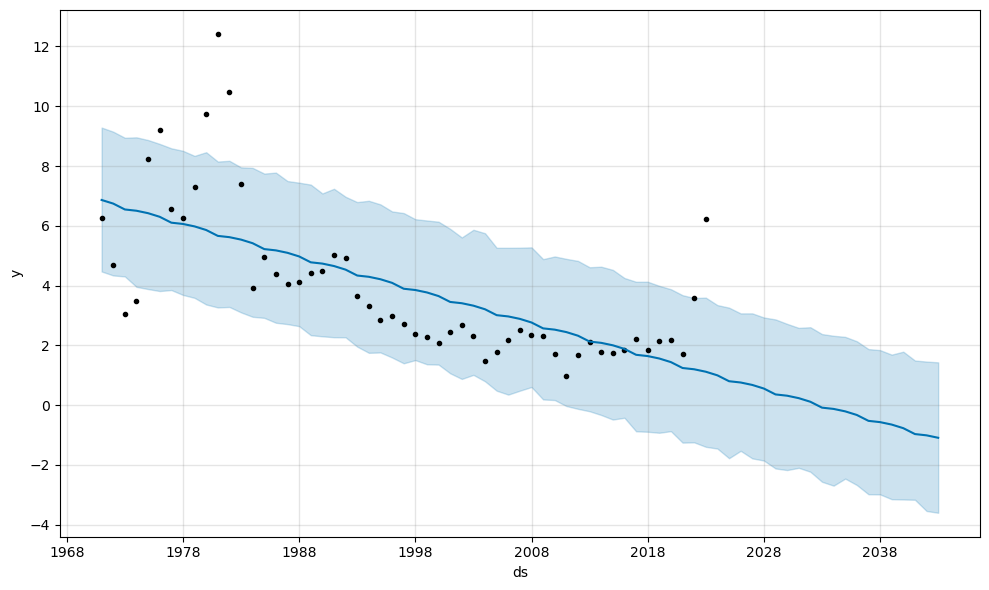

12:53:00 - cmdstanpy - INFO - Chain [1] start processing
12:53:00 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1992-12-31,-1.658208,1.414758,3.696370,-1.658208,-1.658208,4.158067,4.158067,4.158067,4.158067,4.158067,4.158067,0.0,0.0,0.0,2.499859
1,1993-12-31,-1.662056,1.321230,3.623597,-1.662056,-1.662056,4.141930,4.141930,4.141930,4.141930,4.141930,4.141930,0.0,0.0,0.0,2.479874
2,1994-12-31,-1.665903,1.155471,3.487420,-1.665903,-1.665903,4.087358,4.087358,4.087358,4.087358,4.087358,4.087358,0.0,0.0,0.0,2.421455
3,1995-12-31,-1.669751,1.163756,3.479452,-1.669751,-1.669751,3.994415,3.994415,3.994415,3.994415,3.994415,3.994415,0.0,0.0,0.0,2.324665
4,1996-12-31,-1.673609,1.313929,3.657339,-1.673609,-1.673609,4.158067,4.158067,4.158067,4.158067,4.158067,4.158067,0.0,0.0,0.0,2.484459


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
46,2038-12-31,-1.835279,1.132184,3.402638,-1.835281,-1.835277,4.087358,4.087358,4.087358,4.087358,4.087358,4.087358,0.0,0.0,0.0,2.252079
47,2039-12-31,-1.839126,1.085187,3.319702,-1.839128,-1.839123,3.994415,3.994415,3.994415,3.994415,3.994415,3.994415,0.0,0.0,0.0,2.155290
48,2040-12-31,-1.842983,1.162782,3.449890,-1.842985,-1.842980,4.158067,4.158067,4.158067,4.158067,4.158067,4.158067,0.0,0.0,0.0,2.315085
49,2041-12-31,-1.846829,1.063890,3.481037,-1.846832,-1.846827,4.141930,4.141930,4.141930,4.141930,4.141930,4.141930,0.0,0.0,0.0,2.295101
50,2042-12-31,-1.850676,1.008658,3.351651,-1.850679,-1.850673,4.087358,4.087358,4.087358,4.087358,4.087358,4.087358,0.0,0.0,0.0,2.236682


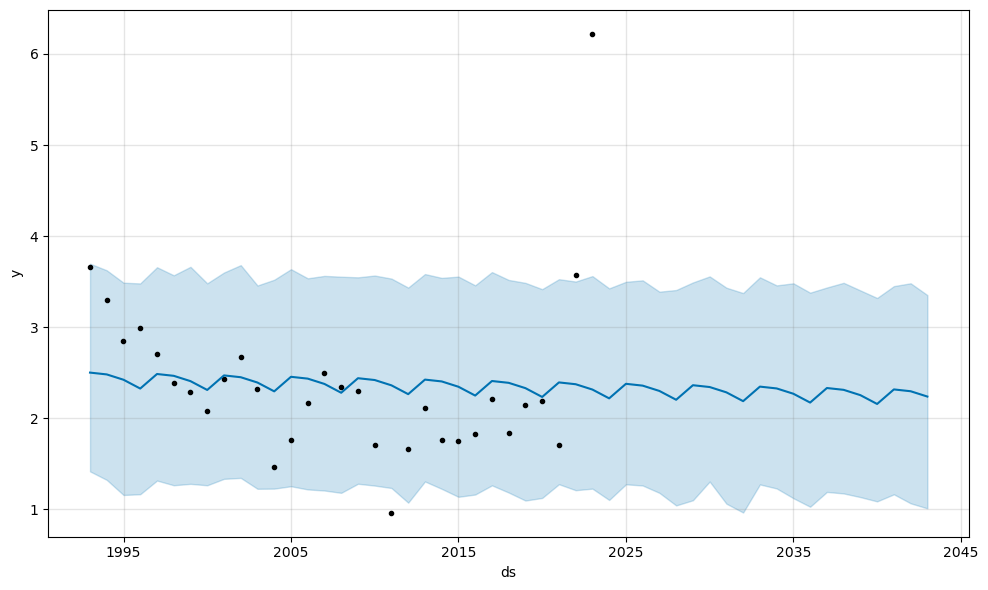

In [106]:
# Run inflation notebook
%run inflation.ipynb

In [107]:
# Check if global variance is available
# Pylance may generate linter warnings for global variables
if "inflation_us_pivot" in globals():
    print("Global variable available.")
else:
    print("Inflation variable not available.\nRerun notebook.")

Global variable available.


In [108]:
# Show inflation index
inflation_us_pivot.index

Index(['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022'],
      dtype='object', name='year')

In [109]:
# Combine data from crime and unemployment with inflation
combined_data = pd.concat([crime_unemployment, inflation_us_pivot["Official Core Consumer Price Inflation"]], join='inner', axis=1)
combined_data

,total_violent,total_nonviolent,unemployment_rate,Official Core Consumer Price Inflation
year,,,,
1991,1.911770,12.961100,6.80,4.91
1992,1.932270,12.505900,7.50,3.66
1993,1.926020,12.218800,6.90,3.30
1994,1.857670,12.131900,6.12,2.85
1995,1.798790,12.063900,5.65,2.99
1996,1.688540,11.805300,5.45,2.70
1997,1.634770,11.558175,5.00,2.39
1998,1.531044,10.944590,4.51,2.29
1999,1.426044,10.208334,4.22,2.08


In [112]:
# Plot combined rates to compare
combined_data_plot = combined_data.hvplot(
    title = "Crime Unemployment Inflation Comparison",
    xlabel = "Year",
    ylabel = "Rate",
    width = 1000,
    height = 500,
    grid = True,
    rot = 45
)

#Display plot
combined_data_plot

:NdOverlay   [Variable]
   :Curve   [year]   (value)

In [111]:
# Correlation for combined data
correlation_matrix = combined_data.corr()
display(correlation_matrix)

,total_violent,total_nonviolent,unemployment_rate,Official Core Consumer Price Inflation
total_violent,1.000000,0.970238,-0.171216,0.840357
total_nonviolent,0.970238,1.000000,-0.247883,0.813683
unemployment_rate,-0.171216,-0.247883,1.000000,-0.200273
Official Core Consumer Price Inflation,0.840357,0.813683,-0.200273,1.000000
